<a href="https://colab.research.google.com/github/matthewdcosta/Assignment1_MDC.ipynb/blob/main/Assignment1_MDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dataset = '/content/drive/MyDrive/sph6004_assignment1_data.csv'
df = pd.read_csv(dataset)
df.head()


,id,hospital_mortality,aki_stage,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,39553978,0,0,F,52.559969,WHITE,91.0,105.0,96.500000,82.0,...,NaN,173.0,173.0,14.0,6.0,4.0,4.0,0.0,152.0,39.4
1,39765666,0,0,F,76.486231,BLACK/AFRICAN AMERICAN,68.0,80.0,73.636364,130.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,76.2
2,37067082,0,0,F,55.881486,WHITE,78.0,106.0,93.200000,117.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,71.2
3,31205490,0,0,F,46.275517,WHITE,55.0,91.0,79.480000,73.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,157.0,72.2
4,37510196,1,2,F,77.018296,BLACK/AFRICAN AMERICAN,38.0,80.0,71.392857,93.0,...,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,157.0,65.0


In [ ]:
import pandas as pd

dataset = '/content/drive/MyDrive/sph6004_assignment1_data.csv'
df = pd.read_csv(dataset)

df['aki_stage'] = df['aki_stage'].apply(lambda x: 1.0 if x == 3 else 0.0)
aki3_sph_data = "/content/drive/MyDrive/aki3_sph_data"
df.to_csv(aki3_sph_data, index=False)
df.head(10)

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD

import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = '/content/drive/MyDrive/sph6004_assignment1_data.csv'
df = pd.read_csv(dataset)
df.head(10)


In [ ]:
import pandas as pd

dataset = "/content/drive/MyDrive/aki3_sph_data"
df = pd.read_csv(dataset)

from sklearn.preprocessing import OrdinalEncoder

cats = df[['gender', 'race']]

encoder = OrdinalEncoder()

cats_encoded = encoder.fit_transform(cats)

df[['gender', 'race']] = cats_encoded

aki3_cats_sph_data = "/content/drive/MyDrive/aki3_cats_sph_data"
df.to_csv(aki3_cats_sph_data, index=False)

df.head(10)




In [ ]:
df.head(10)

In [ ]:
import pandas as pd

dataset = "/content/drive/MyDrive/aki3_cats_sph_data"
df = pd.read_csv(dataset)
Y_df = df["aki_stage"]
X_df = df.drop(columns=["aki_stage", "hospital_mortality", 'id'])

df.fillna(df.mean(), inplace=True)

newaki3_cats_sph_data = "/content/drive/MyDrive/newaki3_cats_sph_data"
df.to_csv(newaki3_cats_sph_data, index=False)


In [ ]:
df.head(5)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
dataset = "/content/drive/MyDrive/newaki3_cats_sph_data"
df = pd.read_csv(dataset)
Y_df = df["aki_stage"]
X_df = df.drop(columns=["aki_stage", "hospital_mortality", 'id'])

columns_to_exclude = ['hospital_mortality', 'aki_stage', 'id']
columns_to_normalize = df.columns.difference(columns_to_exclude)

scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

normalized_aki3_cats_sph_data = "/content/drive/MyDrive/normalized_aki3_cats_sph_data"
df.to_csv(normalized_aki3_cats_sph_data, index=False)



In [ ]:
df.head(15)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
dataset = "/content/drive/MyDrive/normalized_aki3_cats_sph_data"
df = pd.read_csv(dataset)

y_df = df["aki_stage"]
X_df = df.drop(columns=["aki_stage", "hospital_mortality", 'id'])

import torch
import torch.nn as nn
from torch.optim import SGD

import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

X = torch.tensor(X_df.to_numpy(),dtype=torch.float32)
m,n = X.shape
y = torch.tensor(y_df.to_numpy(),dtype=torch.float32).reshape(m,1)

cases = ['train','test']
case_list = np.random.choice(cases,size=X.shape[0],replace=True,p=[0.6,0.4])
X_train = X[case_list=='train']
X_test = X[case_list=='test']
y_train = y[case_list=='train']
y_test = y[case_list=='test']

print('Training input has size: ',X_train.shape)

Training input has size:  torch.Size([30540, 162])


In [ ]:
X_raw = df.drop(columns=['aki_stage', 'id', 'hospital_mortality'])
y_df = df['aki_stage']
X_raw.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 162 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    gender                  float64
 1    admission_age           float64
 2    race                    float64
 3    heart_rate_min          float64
 4    heart_rate_max          float64
 5    heart_rate_mean         float64
 6    sbp_min                 float64
 7    sbp_max                 float64
 8    sbp_mean                float64
 9    dbp_min                 float64
 10   dbp_max                 float64
 11   dbp_mean                float64
 12   mbp_min                 float64
 13   mbp_max                 float64
 14   mbp_mean                float64
 15   resp_rate_min           float64
 16   resp_rate_max           float64
 17   resp_rate_mean          float64
 18   temperature_vital_min   float64
 19   temperature_vital_max   float64
 20   temperature_vital_mean  float64
 21   spo2_min  

In [ ]:
h = torch.nn.Linear(
    in_features=n,
    out_features=1,
    bias=True
)
sigma = torch.nn.Sigmoid()

# Logistic model is linear+sigmoid
f = torch.nn.Sequential(
    h,
    sigma
)

J_BCE = torch.nn.BCELoss()
GD_optimizer = torch.optim.SGD(lr=0.01,params=f.parameters())

nIter = 10000
printInterval = 1000

for i in range(nIter):
    GD_optimizer.zero_grad()
    pred = f(X_train)
    loss = J_BCE(pred,y_train)
    loss.backward()
    GD_optimizer.step()
    if i == 0 or ((i+1)%printInterval) == 0:
        print('Iter {}: average BCE loss is {:.3f}'.format(i+1,loss.item()))

Iter 1: average BCE loss is 0.705
Iter 1000: average BCE loss is 0.370
Iter 2000: average BCE loss is 0.354
Iter 3000: average BCE loss is 0.350
Iter 4000: average BCE loss is 0.348
Iter 5000: average BCE loss is 0.348
Iter 6000: average BCE loss is 0.347
Iter 7000: average BCE loss is 0.347
Iter 8000: average BCE loss is 0.346
Iter 9000: average BCE loss is 0.346
Iter 10000: average BCE loss is 0.346


In [ ]:
threshold = 0.5

with torch.no_grad():
    pred_test = f(X_test)

binary_pred = np.where(pred_test.squeeze()>threshold,'Stage3','0')
label = np.where(y_test.squeeze()>0.5,'Stage3','0')
acc = (binary_pred==label).sum()/binary_pred.shape[0]
print('Accuracy on test dataset is {:.2f}%'.format(acc*100))

Accuracy on test dataset is 85.90%


In [ ]:
pd.crosstab(
    index=label,
    columns=binary_pred,
    rownames=['Label'],
    colnames=['Pred']
)

Pred,0,Stage3
Label,,
0,16817,397
Stage3,2476,690


In [ ]:
pred_df = pd.DataFrame(
    {
        'pred_probability':pred_test.squeeze(),
        'label':label
    }
)
fig = px.scatter(data_frame=pred_df,y='pred_probability',color='label')
fig

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
dataset = "/content/drive/MyDrive/normalized_aki3_cats_sph_data"
df = pd.read_csv(dataset)

y_df = df["aki_stage"]
X_df = df.drop(columns=["aki_stage", "hospital_mortality", 'id'])

import torch
import torch.nn as nn
from torch.optim import SGD

import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

from sklearn.metrics import roc_auc_score, average_precision_score


In [4]:
X_raw = df.drop(columns=['aki_stage', 'id', 'hospital_mortality'])
y_df = df['aki_stage']
X_df = (X_raw-X_raw.mean())/X_raw.std()
X_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,50920.0,3.390846e-17,1.0,-1.124767,-1.124767e+00,8.890560e-01,0.889056,0.889056
admission_age,50920.0,1.995436e-17,1.0,-2.716678,-6.041188e-01,1.025176e-01,0.764503,2.194873
race,50920.0,4.629272e-17,1.0,-3.246098,3.292341e-01,4.616538e-01,0.461654,0.991333
heart_rate_min,50920.0,-8.791083e-18,1.0,-4.554047,-6.545246e-01,-5.968223e-02,0.601254,6.417490
heart_rate_max,50920.0,2.490807e-17,1.0,-3.249129,-7.082637e-01,-1.219103e-01,0.562169,8.673392
...,...,...,...,...,...,...,...,...
gcs_verbal,50920.0,1.227961e-17,1.0,-1.627561,-1.146755e+00,7.764709e-01,0.776471,0.776471
gcs_eyes,50920.0,-1.493089e-17,1.0,-1.927275,-1.129172e-01,7.942618e-01,0.794262,0.794262
gcs_unable,50920.0,1.152609e-16,1.0,-0.509975,-5.099750e-01,-5.099750e-01,-0.509975,1.969933
height,50920.0,1.789613e-17,1.0,-6.360842,4.585272e-16,4.585272e-16,0.049655,7.528568


In [5]:
round(X_raw.apply(X_raw.corrwith),2)

,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
gender,1.00,-0.07,0.04,-0.04,-0.04,-0.04,0.03,-0.01,0.00,0.11,...,-0.01,-0.00,-0.00,0.00,-0.06,-0.04,-0.05,0.05,0.46,0.18
admission_age,-0.07,1.00,0.11,-0.17,-0.16,-0.18,-0.10,0.12,0.03,-0.30,...,-0.01,-0.03,-0.03,-0.08,-0.03,-0.03,-0.02,-0.03,-0.12,-0.11
race,0.04,0.11,1.00,-0.05,-0.03,-0.04,-0.07,-0.06,-0.08,-0.10,...,-0.00,0.00,-0.00,0.00,-0.02,-0.02,-0.02,0.03,0.06,0.03
heart_rate_min,-0.04,-0.17,-0.05,1.00,0.60,0.87,0.00,-0.10,-0.07,0.16,...,0.02,0.03,0.03,0.02,0.03,0.03,0.05,-0.02,-0.01,0.03
heart_rate_max,-0.04,-0.16,-0.03,0.60,1.00,0.84,-0.15,0.02,-0.10,0.05,...,0.02,0.04,0.05,-0.04,-0.05,-0.08,-0.04,0.05,-0.02,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gcs_verbal,-0.04,-0.03,-0.02,0.03,-0.08,-0.05,0.21,-0.06,0.11,0.13,...,-0.00,-0.05,-0.05,0.29,0.68,1.00,0.73,-0.83,-0.01,-0.00
gcs_eyes,-0.05,-0.02,-0.02,0.05,-0.04,-0.02,0.19,-0.04,0.10,0.12,...,-0.00,-0.06,-0.06,0.41,0.78,0.73,1.00,-0.57,-0.03,-0.00
gcs_unable,0.05,-0.03,0.03,-0.02,0.05,0.03,-0.20,-0.00,-0.14,-0.10,...,-0.00,0.05,0.05,0.25,-0.55,-0.83,-0.57,1.00,0.01,0.03
height,0.46,-0.12,0.06,-0.01,-0.02,-0.01,0.03,-0.02,0.00,0.08,...,-0.01,0.00,-0.00,0.00,-0.03,-0.01,-0.03,0.01,1.00,0.20


In [6]:
X = torch.tensor(X_df.to_numpy(),dtype=torch.float32)
m,n = X.shape
y = torch.tensor(y_df.to_numpy(),dtype=torch.float32).reshape(m,1)

cases = ['train','test']
case_list = np.random.choice(cases,size=X.shape[0],replace=True,p=[0.6,0.4])
X_train = X[case_list=='train']
X_test = X[case_list=='test']
y_train = y[case_list=='train']
y_test = y[case_list=='test']


In [ ]:
y_train.unique(return_counts=True)

(tensor([0., 1.]), tensor([25761,  4742]))

In [7]:
h = torch.nn.Linear(
    in_features=n,
    out_features=1,
    bias=True
)
sigma = torch.nn.Sigmoid()

# Logistic model is linear+sigmoid
f = torch.nn.Sequential(
    h,
    sigma
)

J_BCE = torch.nn.BCELoss()

GD_optimizer = torch.optim.Adam(lr=0.001,params=f.parameters())

nIter = 50000
printInterval = 10000

for i in range(nIter):
    GD_optimizer.zero_grad()
    pred = f(X_train)
    loss = J_BCE(pred,y_train)
    loss.backward()
    GD_optimizer.step()
    if i == 0 or ((i+1)%printInterval) == 0:
        print('Iter {}: average BCE loss is {:.3f}'.format(i+1,loss.item()))

with torch.no_grad():
    pred_test = f(X_test)

auroc = roc_auc_score(y_test,pred_test)
ap = average_precision_score(y_test,pred_test)
print('On test dataset: AUROC {:.3f}, AP {:.3f}'.format(auroc,ap))


Iter 1: average BCE loss is 0.743
Iter 10000: average BCE loss is 0.345
Iter 20000: average BCE loss is 0.345
Iter 30000: average BCE loss is 0.345
Iter 40000: average BCE loss is 0.345
Iter 50000: average BCE loss is 0.345
On test dataset: AUROC 0.806, AP 0.474


In [12]:
weight = h.weight.detach().squeeze().clone()

In [8]:
h_L2 = torch.nn.Linear(
    in_features=n,
    out_features=1,
    bias=True
)
sigma = torch.nn.Sigmoid()

f_L2 = torch.nn.Sequential(
    h_L2,
    sigma
)

J_BCE = torch.nn.BCELoss()

GD_optimizer = torch.optim.Adam(lr=0.01,params=f_L2.parameters(),weight_decay=0.05)

nIter = 5000
printInterval = 1000

for i in range(nIter):
    GD_optimizer.zero_grad()
    pred = f_L2(X_train)
    loss = J_BCE(pred,y_train)
    loss.backward()
    GD_optimizer.step()
    if i == 0 or ((i+1)%printInterval) == 0:
        print('Iter {}: average BCE loss is {:.3f}'.format(i+1,loss.item()))

with torch.no_grad():
    pred_test = f_L2(X_test)

auroc = roc_auc_score(y_test,pred_test)
ap = average_precision_score(y_test,pred_test)
print('On test dataset: AUROC {:.3f}, AP {:.3f}'.format(auroc,ap))

Iter 1: average BCE loss is 0.711
Iter 1000: average BCE loss is 0.374
Iter 2000: average BCE loss is 0.374
Iter 3000: average BCE loss is 0.374
Iter 4000: average BCE loss is 0.374
Iter 5000: average BCE loss is 0.374
On test dataset: AUROC 0.805, AP 0.472


In [9]:
h_L1 = torch.nn.Linear(
    in_features=n,
    out_features=1,
    bias=True
)
sigma = torch.nn.Sigmoid()

f_L1 = torch.nn.Sequential(
    h_L1,
    sigma
)

J_BCE = torch.nn.BCELoss()

GD_optimizer = torch.optim.Adam(lr=0.01,params=f_L1.parameters())


def L1_reg(model,lbd):
    result = torch.tensor(0)
    for param in model.parameters():
        result = result + param.abs().sum()

    return lbd*result


nIter = 5000
printInterval = 500
lbd = 0.03 # L1 reg strength

for i in range(nIter):
    GD_optimizer.zero_grad()
    pred = f_L1(X_train)
    loss = J_BCE(pred,y_train)
    (loss+L1_reg(f_L1,lbd)).backward()
    GD_optimizer.step()
    if i == 0 or ((i+1)%printInterval) == 0:
        print('Iter {}: average BCE loss is {:.3f}'.format(i+1,loss.item()))

with torch.no_grad():
    pred_test = f_L1(X_test)

auroc = roc_auc_score(y_test,pred_test)
ap = average_precision_score(y_test,pred_test)
print('On test dataset: AUROC {:.3f}, AP {:.3f}'.format(auroc,ap))

Iter 1: average BCE loss is 0.734
Iter 500: average BCE loss is 0.390
Iter 1000: average BCE loss is 0.390
Iter 1500: average BCE loss is 0.390
Iter 2000: average BCE loss is 0.390
Iter 2500: average BCE loss is 0.390
Iter 3000: average BCE loss is 0.390
Iter 3500: average BCE loss is 0.391
Iter 4000: average BCE loss is 0.390
Iter 4500: average BCE loss is 0.390
Iter 5000: average BCE loss is 0.390
On test dataset: AUROC 0.774, AP 0.416


In [13]:
weight_L1 = h_L1.weight.detach().squeeze().clone()
weight_L2 = h_L2.weight.detach().squeeze().clone()
weight_df = pd.DataFrame(
    {
        'vanilla':weight,
        'L2':weight_L2,
        'L1':weight_L1
    }
).melt(id_vars=[],value_vars=['vanilla','L2','L1'])
weight_df

,variable,value
0,vanilla,-0.116841
1,vanilla,0.242038
2,vanilla,0.007485
3,vanilla,0.195680
4,vanilla,0.156782
...,...,...
481,L1,-0.052461
482,L1,-0.002604
483,L1,0.000800
484,L1,0.001525


In [14]:
fig = px.box(
    weight_df,
    y='value',
    facet_col='variable',
    color='variable',
    points='all',
    title='Logistic Regression Weights Distributions'
)
fig.update_yaxes(
    matches=None,
    showticklabels=True
)
fig.update_traces(jitter=0.5)

In [15]:
from sklearn.linear_model import LogisticRegression as logit
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_curve, precision_recall_curve

In [16]:
X_df_train = X_df.iloc[case_list=='train',:]
X_df_test = X_df.iloc[case_list=='test',:]
y_df_train = y_df.iloc[case_list=='train']
y_df_test = y_df.iloc[case_list=='test']

In [17]:
model = logit(penalty='l1',C=1/10,solver='liblinear')

forward_selection = SFS(
    model, n_features_to_select=3, direction="forward"
).fit(X_df_train, y_df_train)


In [18]:
forward_selection.get_feature_names_out()

array(['creatinine_min', 'creatinine_max', 'bilirubin_total_max'],
      dtype=object)

In [ ]:
model = logit(penalty='l1',C=1/10,solver='liblinear')

backward_selection = SFS(
    model, n_features_to_select=3, direction="backward"
).fit(X_df_train, y_df_train)

# New Section

In [ ]:
backward_selection.get_feature_names_out()

In [ ]:
# Full model
model.fit(X_df_train,y_df_train)
y_pred_full = model.predict_proba(X_df_test)

# Model with forward selected features
model.fit(forward_selection.transform(X_df_train),y_df_train)
y_pred_FS = model.predict_proba(forward_selection.transform(X_df_test))

# Model with backward selected features
model.fit(backward_selection.transform(X_df_train),y_df_train)
y_pred_BS = model.predict_proba(backward_selection.transform(X_df_test))

In [ ]:
# roc_curve
fpr_full, tpr_full, _ = roc_curve(y_df_test,y_pred_full[:,1])
fpr_FS, tpr_FS, _ = roc_curve(y_df_test,y_pred_FS[:,1])

roc_df = pd.DataFrame(
    {
        'False Positive Rate':np.hstack([fpr_full,fpr_FS,fpr_BS]),
        'True Positive Rate':np.hstack([tpr_full,tpr_FS,tpr_BS]),
        'method':['full_model']*len(fpr_full)+['FS']*len(fpr_FS)+['BS']*len(fpr_BS)
    }
)

In [ ]:
# Visualize ROC curve
fig = px.line(roc_df,y='True Positive Rate',x='False Positive Rate',facet_col='method',color='method')
fig

In [ ]:
# precision recall curves
p_full, r_full, _ = precision_recall_curve(y_df_test,y_pred_full[:,1])
p_FS, r_FS, _ = precision_recall_curve(y_df_test,y_pred_FS[:,1])
p_BS, r_BS, _ = precision_recall_curve(y_df_test,y_pred_BS[:,1])

pr_df = pd.DataFrame(
    {
        'Precision':np.hstack([p_full,p_FS,p_BS]),
        'Recall':np.hstack([r_full,r_FS,r_BS]),
        'method':['Full Model']*len(p_full)+['Forward Selection']*len(p_FS)+['Backward Selection']*len(p_BS)
    }
)

In [ ]:
# Visualize precision recall curve
fig = px.line(pr_df,x='Recall',y='Precision',facet_col='method',color='method')
fig

In [ ]:
# We will use the following packages

# NumPy for math operations, and Pandas for processing tabular data.
import numpy as np
import pandas as pd

# Plotly plotting package
import plotly.graph_objects as go
import plotly.express as px

# Tools in sklearn to select best model
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV

# Decision tree classifier in sklearn
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

# We use f1 score to test model performance
from sklearn.metrics import f1_score

# Import matplotlib.pyplot to visualize tree models
import matplotlib.pyplot as plt

In [ ]:
y_df = df["aki_stage"]
X_df = df.drop(columns=["aki_stage", "hospital_mortality", 'id'])

X_df = X_raw[['creatinine_max', 'sbp_min', 'weight_admit']]
Xy = pd.concat([X_df,y_df],axis=1)
Xy['label'] = np.where(Xy['aki_stage'].to_numpy()==0,'0.0','1.0')
Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   creatinine_max  50920 non-null  float64
 1   sbp_min         50920 non-null  float64
 2   weight_admit    50920 non-null  float64
 3   aki_stage       50920 non-null  float64
 4   label           50920 non-null  object 
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [ ]:
fig = px.scatter_3d(
    Xy,
    z='creatinine_max',
    y='sbp_min',
    x='weight_admit',
    color='label'
)

fig.update_traces(
    marker={'size':2.5}
)

surface_z = [[0.052,0.052],[0.052,0.052]]
surface_y = [0.1,2.7]
surface_x = [0,0.29]

fig.add_trace(
    go.Surface(
        x=surface_x,
        y=surface_y,
        z=surface_z,
        opacity=0.5,
        showscale=False,
        colorscale='greys',
        name='separating hyperplane',
        showlegend=True,
        visible='legendonly'
    )
)

fig

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_df,y_df,test_size=0.3,random_state=10,
    stratify=y_df, shuffle=True
)

In [ ]:
TreeModel = DTC(criterion='entropy',max_depth=1,random_state=15)
TreeModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=15)

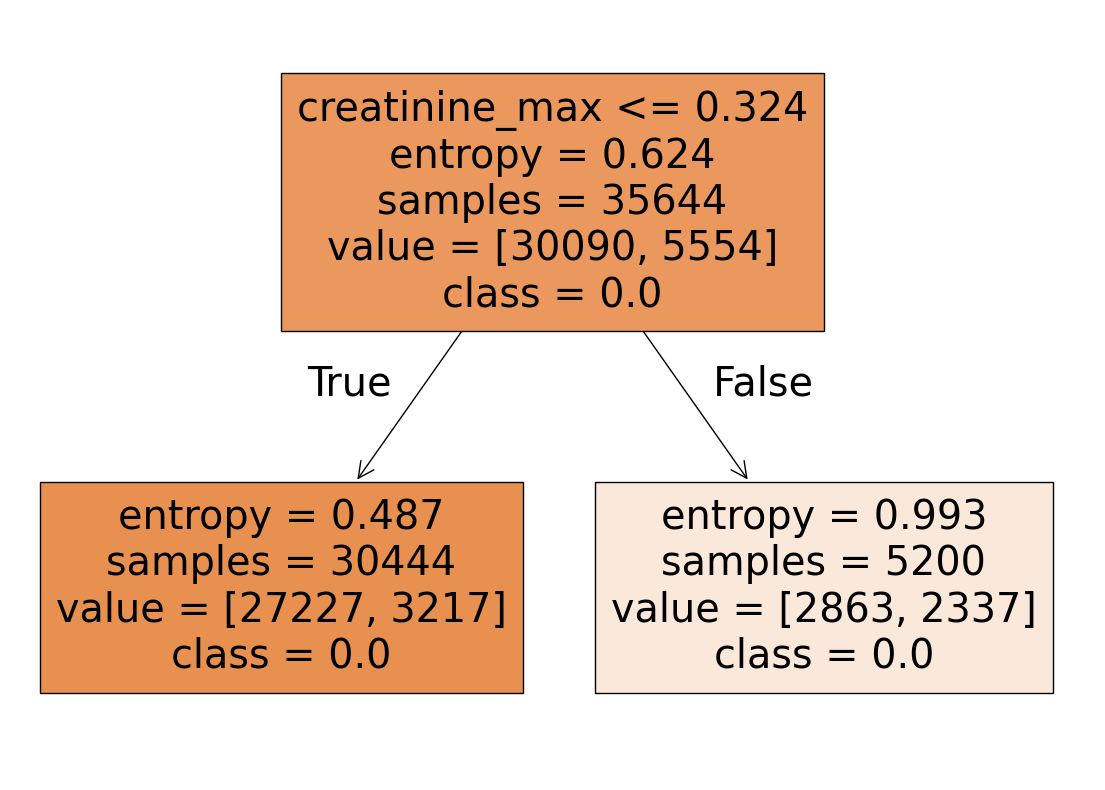

In [ ]:
plt.figure(figsize=(14,10))
plot_tree(
    TreeModel,
    filled=True,
    feature_names=['creatinine_max', 'sbp_min', 'weight_admit'],
    class_names=['0.0','1.0']
)
plt.show()

In [ ]:
parameters = {'max_depth':np.arange(start=1,stop=10,step=1)}
parameters

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [ ]:
stratifiedCV = StratifiedKFold(n_splits=8)
TreeModel = DTC(criterion='entropy')
BestTree = GridSearchCV(
    TreeModel,
    param_grid=parameters,
    scoring='f1',
    cv=stratifiedCV
)
BestTree.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1')

In [ ]:
BestTree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
BestTree.best_score_

0.3397548636794603

In [ ]:
y_pred = BestTree.predict(X_test)
print('F1 score on test set: {:.4f}'.format(f1_score(y_test,y_pred)))
pd.crosstab(y_test,y_pred)

F1 score on test set: 0.3380


col_0,0.0,1.0
aki_stage,,
0.0,12483,413
1.0,1812,568


In [ ]:
from xgboost import XGBClassifier as XGBC

In [ ]:
parameters = {
    'n_estimators':np.arange(start=2,stop=20,step=2),
    'max_depth':np.arange(start=2,stop=6,step=1),
    'learning_rate':np.arange(start=0.05,stop=0.4,step=0.05)
}

parameters

{'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'max_depth': array([2, 3, 4, 5]),
 'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35])}

In [ ]:
stratifiedCV = StratifiedKFold(n_splits=8)
# XGBC: XGBoost classifier
XGBoostModel = XGBC()
BestXGBoost = GridSearchCV(
    XGBoostModel,
    param_grid=parameters,
    scoring='f1',
    cv=stratifiedCV,
    verbose=1,
    n_jobs=-1 # use all cpu cores to speedup grid search
)
BestXGBoost.fit(X_train,y_train)

Fitting 8 folds for each of 252 candidates, totalling 2016 fits


GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
                         'max_depth': array([2, 3, 4, 5]),
                         'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
             scoring='f1', verbose=1)

In [ ]:
BestXGBoost.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 18}

In [ ]:
BestXGBoost.best_score_

0.3214874348567462

In [ ]:
from sklearn.svm import SVC
nonlinear_models = {
    'DecisionTree':DTC(criterion='entropy'),
    'XGBoost':XGBC(),
    'SVM_rbf':SVC(kernel='rbf')
}

stratifiedCV = StratifiedKFold(n_splits=8)


params = {
    'DecisionTree':{
        'max_depth':np.arange(start=1,stop=10)
    },
    'XGBoost':{
        'n_estimators':np.arange(start=2,stop=20,step=2),
        'max_depth':np.arange(start=2,stop=6),
        'learning_rate':np.arange(start=0.05,stop=0.4,step=0.05)
    },
    'SVM_rbf':{
        'C':np.arange(0.5,5,step=0.5)
    }
}

records = {}

for model in nonlinear_models:
    BestParams = GridSearchCV(
        nonlinear_models[model],
        param_grid = params[model],
        scoring='f1',
        cv=stratifiedCV,
        n_jobs=-1
    )
    BestParams.fit(X_train,y_train)

    print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))

For DecisionTree cross validation F1 score is 0.3394
For XGBoost cross validation F1 score is 0.3215


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



For SVM_rbf cross validation F1 score is 0.2921
